<center><h1>House Price Prediction</h1></center>

## Import Libraries

In [1]:
#Important module and library  to run the program 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Read Dataset

In [2]:
df = pd.read_csv("home_data.csv") #df for dataframe,read the data from the csv data file
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Visualize the house price based on house living sqft

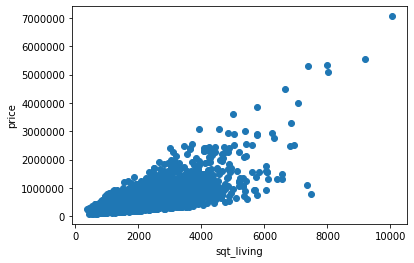

In [3]:
%matplotlib inline
plt.xlabel('sqt_living')
plt.ylabel('price')
plt.scatter(df.sqft_living[1:5000], df.price[1:5000])

## Select the necessary Dataset for making our model

In [4]:
x = df[['sqft_living']]
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [5]:
y = df['price']
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

## Split Dataset into training data and test data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [7]:
x_train

,sqft_living
15949,930
16409,700
14668,1580
6877,1646
20213,1450
...,...
9372,1850
7291,2190
17728,1580
7293,1410


In [8]:
x_test

,sqft_living
957,2100
14143,2230
19452,290
20510,1390
18354,1700
...,...
5349,1690
11082,2240
4413,3740
17461,1720


In [9]:
y_train

15949    235000
16409    225000
14668    729000
6877     305000
20213    380000
          ...  
9372     245000
7291     353000
17728    475000
7293     279900
17673    217500
Name: price, Length: 17290, dtype: int64

In [10]:
y_test

957       323000
14143     690000
19452     142000
20510     560000
18354     545000
          ...   
5349      386591
11082     344950
4413     1150000
17461     622200
9848      450000
Name: price, Length: 4323, dtype: int64

## Make a linear Reagression Model that predict price based on house living sqft

In [11]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Average Price of the houses

In [12]:
print (y_test.mean())

539467.7106176267


## Evaluate our model

In [13]:
reg.score(x_test,y_test)

0.5073460486656691

## Predict house prices based on our test data

In [14]:
reg.predict(x_test)

array([ 545726.49499998,  581783.83165916,   43697.423053  , ...,
       1000603.66516189,  440328.12630393,  409818.07220771])

## Compare the both plot original data and predicted data

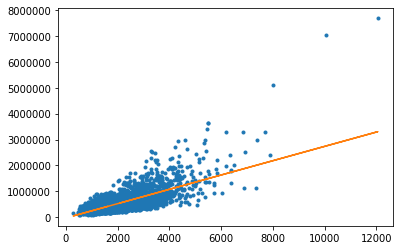

In [15]:
plt.plot(x_test,y_test,'.',
        x_test,reg.predict(x_test)  ,'-')

## See the intercept and coef of this regression model

In [16]:
print(reg.intercept_)
print(reg.coef_)

-36738.174109773245
[277.36412815]


## Explore new features

In [17]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [18]:
df[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,98103
21609,4,2.50,2310,5813,2.0,98146
21610,2,0.75,1020,1350,2.0,98144
21611,3,2.50,1600,2388,2.0,98027


## Plot price vs zipcode

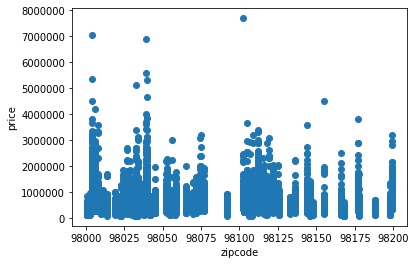

In [19]:
plt.xlabel('zipcode')
plt.ylabel('price')
plt.scatter(df.zipcode, df.price)

## Selecting our data set for making our model

In [20]:
x2 = df[my_features]
y2 = df.price

## Spliting our dataset into training data and test data

In [21]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=10)

In [22]:
x_train2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
15949,2,1.00,930,10505,1.0,98148
16409,2,1.00,700,6000,1.0,98055
14668,3,1.00,1580,3840,2.0,98102
6877,3,2.25,1646,12414,2.0,98038
20213,3,3.25,1450,1468,2.0,98126
...,...,...,...,...,...,...
9372,3,2.00,1850,8208,1.0,98023
7291,3,1.75,2190,7021,1.0,98178
17728,4,1.50,1580,10260,1.0,98007
7293,3,2.00,1410,6600,1.0,98042


In [23]:
y_train2

15949    235000
16409    225000
14668    729000
6877     305000
20213    380000
          ...  
9372     245000
7291     353000
17728    475000
7293     279900
17673    217500
Name: price, Length: 17290, dtype: int64

In [24]:
x_test2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
957,3,1.75,2100,14850,1.0,98042
14143,4,2.00,2230,5000,1.5,98144
19452,0,0.00,290,20875,1.0,98024
20510,3,2.50,1390,1411,3.0,98103
18354,4,2.00,1700,2350,1.0,98117
...,...,...,...,...,...,...
5349,3,2.50,1690,1613,2.0,98029
11082,4,1.75,2240,7500,1.0,98133
4413,4,2.25,3740,18000,1.0,98177
17461,3,1.75,1720,7200,1.0,98125


In [25]:
y_test2

957       323000
14143     690000
19452     142000
20510     560000
18354     545000
          ...   
5349      386591
11082     344950
4413     1150000
17461     622200
9848      450000
Name: price, Length: 4323, dtype: int64

## Making our linear regression model

In [26]:
reg_my_feature=LinearRegression()
reg_my_feature.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evalutaing our regression model

In [27]:
reg_my_feature.score(x_test2,y_test2)

0.5275075098745893

## Compare the score of two regression model

In [28]:
print(reg.score(x_test,y_test))
print(reg_my_feature.score(x_test2,y_test2))

0.5073460486656691
0.5275075098745893


## Select a house form our data set for checking our models

In [29]:
house1 = df[df['id'] == 5309101200]

In [30]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="house_images/house1.png">

In [31]:
print("House Original Price {}".format(int(house1['price'])))

House Original Price 620000


## Predicting the house price based on only the size of living sqft

In [32]:
# print(reg.predict([[house1['sqft_living']]]))
data = house1['sqft_living']
data = data.to_frame()
print("Price {}".format(float(reg.predict(data))))

Price 628935.7334442345


## Predicting the house price based on my features

In [33]:
data = house1[my_features]
print("Price {}".format(float(reg_my_feature.predict(data))))

Price 630742.1498724297


## Select Another House

In [34]:
house2 = df[df['id'] == 1925069082]

In [35]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="house_images/house2.jpg">

In [36]:
print("House Original Price {}".format(float(house2['price'])))

House Original Price 2200000.0


## Predicting the house price based on only the size of living sqft

In [37]:
data = house2['sqft_living']
data = data.to_frame()
print("Price {}".format(float(reg.predict(data))))

Price 1250231.3804946416


## Predicting the house price based on my features

In [38]:
data = house1[my_features]
print("Price {}".format(float(reg_my_feature.predict(data))))

Price 630742.1498724297


## Now take a house with this features bellow

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}
type(bill_gates)

## Predict the price of this house 

In [ ]:
bill_gates = pd.DataFrame(bill_gates)
print("Price {}".format(float(reg_my_feature.predict(bill_gates[my_features]))))

## Thank You